In [93]:
import numpy as np 
import pandas as pd 
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [94]:
# import the data
twitterData = pd.read_csv('datasets/twitterData.csv')
# Clean the Tweets data
X = twitterData[['Tweets', 'Subjectivity', 'Polarity']] 
y = twitterData['Label']
twitterData.head()

,Tweets,Subjectivity,Polarity,Label,User,Domain
0,"Yeah, playing games on the computer like a ge...",0.000000,0.0,Neutral,HenrywCavill_,Actor
1,Very well I only had to get up at 6am today a...,0.633333,0.3,Positive,HenrywCavill_,Actor
2,I slept great And you Charming smile,0.616667,0.6,Positive,HenrywCavill_,Actor
3,Look at me of course I'm sure glares,0.888889,0.5,Positive,HenrywCavill_,Actor
4,of course,0.000000,0.0,Neutral,HenrywCavill_,Actor


In [95]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


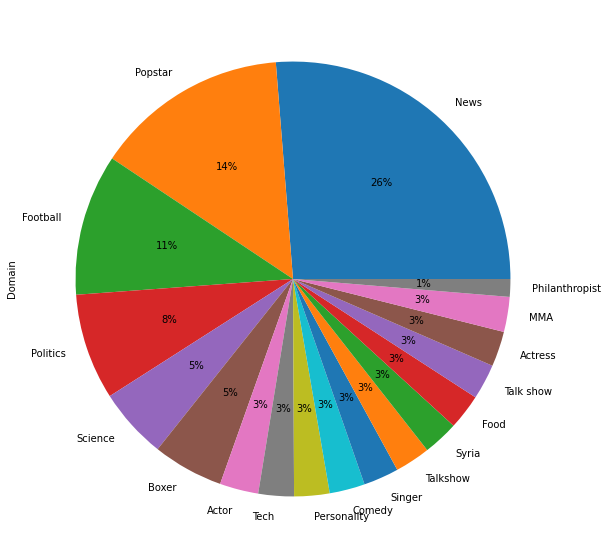

In [96]:
twitterData.Domain.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

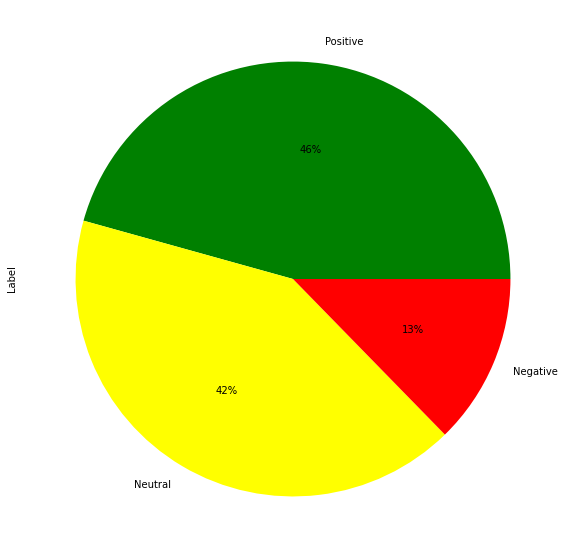

In [97]:
twitterData.Label.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "yellow", "red"])
plt.show()

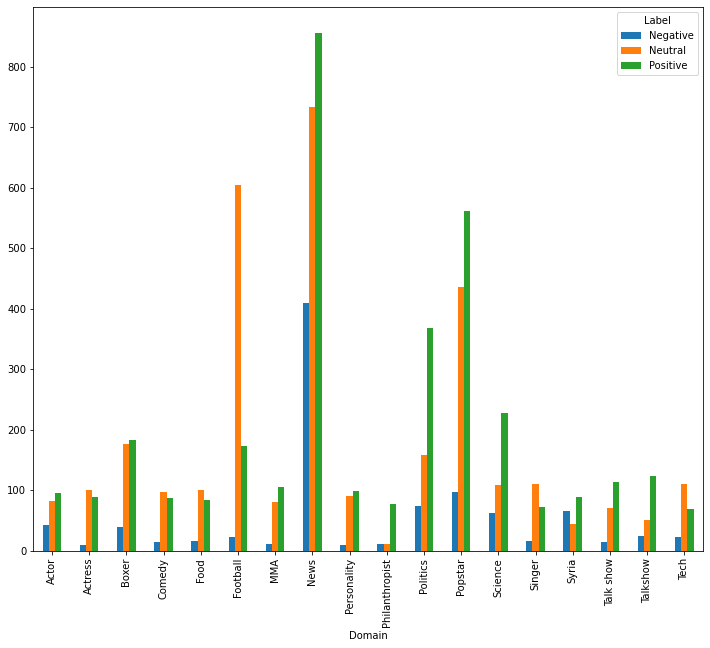

In [98]:
tweet_sentiment = twitterData.groupby(['Domain', 'Label']).Tweets.count().unstack()
tweet_sentiment.plot(kind='bar')
plt.show()

In [99]:
features = twitterData.iloc[:, 0].values
labels = twitterData.iloc[:, 3].values

In [111]:
# clean each tweet
cleaned_data = []

for text in range(0, len(features)):
    
    clean_data = word_tokenize(str(features[text])) 
    # Remove all the special characters
    clean_data = re.sub(r'\W', ' ', str(features[text]))
    
    # Remove @mentions
    clean_data = re.sub(r'@[A-Za-z0-9]+', '', clean_data)

    # remove all single characters
    clean_data= re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_data)

    # Remove single characters from the start
    clean_data = re.sub(r'\^[a-zA-Z]\s+', ' ', clean_data) 

    # Substituting multiple spaces with single space
    clean_data = re.sub(r'\s+', ' ', clean_data, flags=re.I)

    # Removing prefixed 'b'
    clean_data = re.sub(r'^b\s+', '', clean_data)

    # Converting to Lowercase
    clean_data = clean_data.lower()
    
    cleaned_data.append(clean_data)
        

In [114]:
print(cleaned_data[189])

i look forward to working with the new administration and leaders on both sides in congress on getting the surging pandemic under control engaging partners around the world on issues like poverty and climate change and addressing issues of inequality and opportunity at home


In [101]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# ignore terms that appear in more 80%
Tfidf = TfidfVectorizer (max_features=6000, min_df=7, max_df=0.8, 
                              analyzer='word', stop_words=stopwords.words('english'))
cleaned_data = Tfidf.fit_transform(features).toarray() #

In [102]:
# create train, test and split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=32) 




In [103]:
##### from sklearn.neural_network import MLPClassifier

# create neural network and fit training data
nn_class = MLPClassifier(max_iter=10000, hidden_layer_sizes=(4,), random_state=1, solver='lbfgs')
nn_class.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(4,), max_iter=10000, random_state=1,
              solver='lbfgs')

In [104]:
# set the model.predict
y_pred = nn_class.predict(X_test)



In [105]:
# create and print(confusion_matrix(y_test,predictions))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

print(cm)
print()
# print classification report and accuracy score 
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

     0    1    2
0  104   47   53
1   57  463   80
2   53   78  588

              precision    recall  f1-score   support

    Negative       0.49      0.51      0.50       204
     Neutral       0.79      0.77      0.78       600
    Positive       0.82      0.82      0.82       719

    accuracy                           0.76      1523
   macro avg       0.70      0.70      0.70      1523
weighted avg       0.76      0.76      0.76      1523

0.7583716349310571


In [106]:
# test and print the polarity of the model for a givin tweet
test_array = np.array(["Raises a brow You're welcome"])
test_vector = Tfidf.transform(test_array)
print (nn_class.predict(test_vector))

['Positive']
